# Chapter 6 시계열 분해

추세(trend), 계절성(seasonality), 주기(cycle) 이렇게 세 가지 시계열 패턴

추세-주기 성분(추세와 주기를 결합), 계절성 성분, (시계열의 나머지 요소를 포함하는) 나머지(remainder) 성분.


## 6.1 시계열 성분

덧셈 분해(additive decomposition)를 가정하면

\begin{align*}
  y_{t} = S_{t} + T_{t} + R_t,
\end{align*}


여기에서 $y_{t}$는 데이터이고, $S_{t}$는 계절성분, $T_{t}$는 추세-주기 성분, $R_t$는 나머지 성분


곱셈 분해(multiplicative decomposition)는

\begin{align*}
  y_{t} = S_{t} \times T_{t} \times R_t.
\end{align*}

계절성 요동의 크기나 추세-주기 주위의 변동이 시계열의 수준에 의해 변하지 않을때 => 덧셈분해  
계절성 패턴에서 변동이나 추세-주기 주위의 변동이 시계열의 수준(level)에 비례할때 => 곱셈분해, 경제 분야 시계열

곱셈분해는 로그 변환을 사용하면, 아래 식에서 볼 수 있는 이유 때문에 덧셈 모델이 곱셈 분해를 사용

\begin{align*}
  y_{t} = S_{t} \times T_{t} \times R_t \quad\text{는 오른쪽 식과 같습니다}\quad
  \log y_{t} = \log S_{t} + \log T_{t} + \log R_t.
\end{align*}  

### 전자 장비 제조

Figure 6.1: 전자 장비 주문: 추세-주기 성분 (빨간색) 그리고 원본 데이터 (회색).  
이 데이터는 유럽 지역(16개국)에서 전자 장비(컴퓨터, 전자, 광학 제품)에 대한 신규 주문량을 나타냅니다. 근무일 기준으로 조정되었고, 2005년 값이 100이 되도록 조정된 데이터입니다.
![](https://otexts.com/fppkr/fpp_files/figure-html/elecequip-trend-1.png)

Figure 6.2: 전자 장비 주문(위)과 세 가지 덧셈 성분.
![](https://otexts.com/fppkr/fpp_files/figure-html/elecequip-stl-1.png)



### 계절성으로 조정된 데이터

원본 데이터에서 계절성분을 제거한 결과 값을 “계절성으로 조정된(seasonally adjusted)” 데이터라고 함.  

덧셈 분해에서, 계절성으로 조정된 데이터는  $y_{t}-S_{t}$   
곱셈 분해에서는 $y_{t}/S_{t}$  
 

Figure 6.3: 계절성으로 조정된 전자 장비 구매(파란색)와 원본 데이터(회색).
![](https://otexts.com/fppkr/fpp_files/figure-html/elecequip-sa-1.png)

계절성으로 조정된 시계열은 유용함.   
예를 들면, 월별 실업률 데이터를 다룰 때, 학교를 졸업한 사람들이 일자리를 찾는 것 때문에 나타나는 실업률 증가는 계절성 변동 나타나고  경기 침체 때문에 실업자가 많아서 생기는 증가는 비-계절성 변동이라고 하며,  비-계절성 변동에 관심

## 6.2 이동평균

### 이동 평균 평활

차수(order)m의 이동 평균

\begin{equation}
  \hat{T}_{t} = \frac{1}{m} \sum_{j=-k}^k y_{t+j}, \tag{6.1}
\end{equation}

m = 2 k + 1이며,  즉, k기간 안의 시계열 값을 평균하여 시간t 의 추세-주기를 측정

In [ ]:
library(fpp2)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

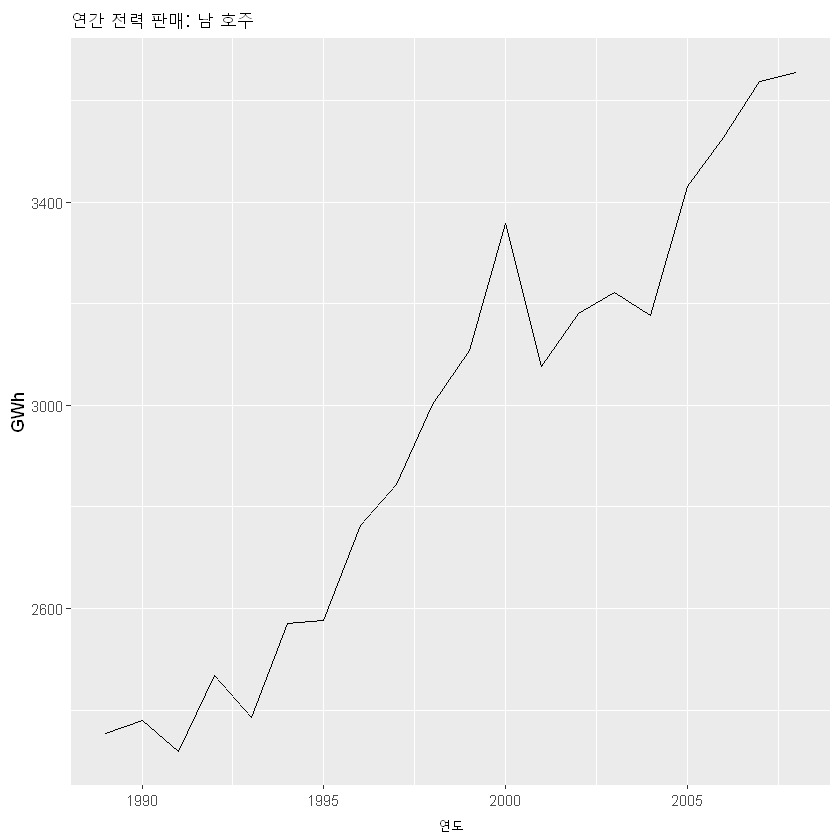

In [3]:
autoplot(elecsales) + xlab("연도") + ylab("GWh") +
  ggtitle("연간 전력 판매: 남 호주")
## Figure 6.4: 남 호주 주거용 전력 판매량 (온수 판매는 제외): 1989–2008.

In [17]:
print( elecsales )

Time Series:
Start = 1989 
End = 2008 
Frequency = 1 
 [1] 2354.34 2379.71 2318.52 2468.99 2386.09 2569.47 2575.72 2762.72 2844.50
[10] 3000.70 3108.10 3357.50 3075.70 3180.60 3221.60 3176.20 3430.60 3527.48
[19] 3637.89 3655.00


![](6_1.jpg)

In [30]:
# 이동 평균은 아래와 같이 ma()함수로 계산 
class(elecsales) 

print( ma(elecsales, 5) )

[1] "ts"

Time Series:
Start = 1989 
End = 2008 
Frequency = 1 
 [1]       NA       NA 2381.530 2424.556 2463.758 2552.598 2627.700 2750.622
 [9] 2858.348 3014.704 3077.300 3144.520 3188.700 3202.320 3216.940 3307.296
[17] 3398.754 3485.434       NA       NA


Warning message:
"Removed 4 rows containing missing values (geom_path)."

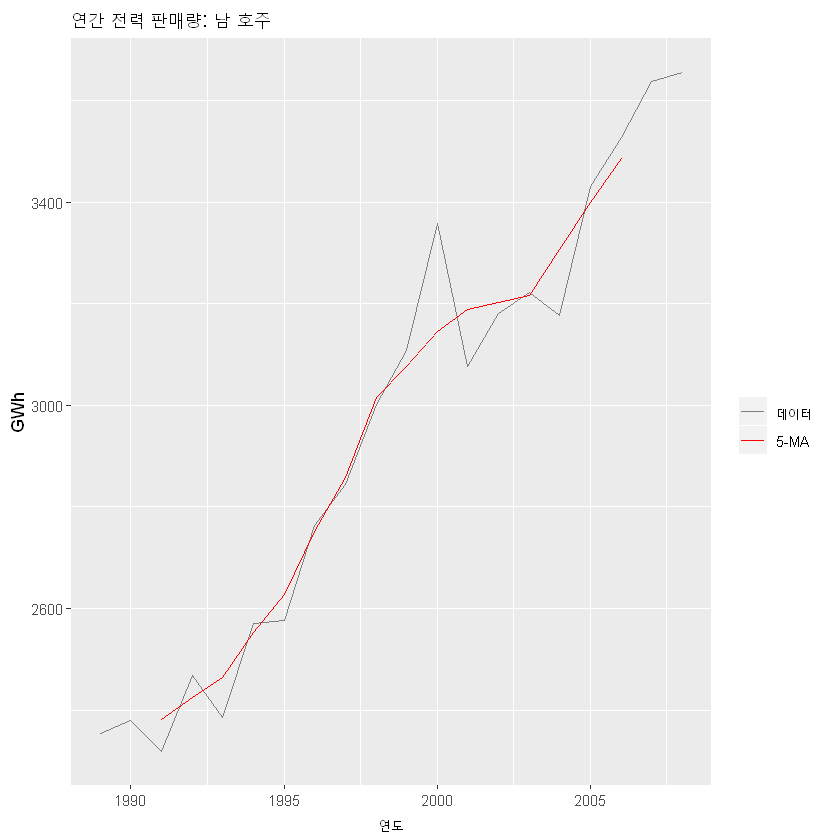

In [25]:
autoplot(elecsales, series="데이터") +
  autolayer(ma(elecsales,5), series="5-MA") +
  xlab("연도") + ylab("GWh") +
  ggtitle("연간 전력 판매량: 남 호주") +
  scale_colour_manual(values=c("데이터"="grey50","5-MA"="red"),
                      breaks=c("데이터","5-MA")) +
  guides(colour=guide_legend(title=" "))

## Figure 6.5: 주거용 전력 판매량(검은색)을 추세-주기(빨간색)의 5-MA 추정과 함께 나타낸 것.

Figure 6.6: 다른 이동평균을 주거용 전력 판매량 데이터에 적용한 것.

![](https://otexts.com/fppkr/fpp_files/figure-html/ressales3-1.png)

### 이동평균의 이동평균


이동평균값을 또다시 이동평균할 수 있습니다. 짝수 차수 이동 평균을 대칭적으로 만들기 위해서 이러한 작업

예를 들어, 차수 4의 이동 평균을 구한다고 하고, 그 다음 그 결과를 가지고 차수 2의 이동 평균을 구한다고 합시다. 호주 4분기별 맥주 생산량 처음 몇 년 데이터를 가지고 이러한 작업을 하여 다음의 표에 나타냄.

In [26]:
beer2 <- window(ausbeer,start=1992)
ma4 <- ma(beer2, order=4, centre=FALSE)
ma2x4 <- ma(beer2, order=4, centre=TRUE)

![](6_2.jpg)

  
2 × 4-MA를 다음과 같이 수식으로 정리,

\begin{align*}
  \hat{T}_{t} &= \frac{1}{2}\Big[
    \frac{1}{4} (y_{t-2}+y_{t-1}+y_{t}+y_{t+1}) +
    \frac{1}{4} (y_{t-1}+y_{t}+y_{t+1}+y_{t+2})\Big] \\
             &= \frac{1}{8}y_{t-2}+\frac14y_{t-1} +
             \frac14y_{t}+\frac14y_{t+1}+\frac18y_{t+2}.
\end{align*}

### 계절성 데이터에서 추세-주기를 측정하기


중심화된 이동평균(centred moving average)의 주 용도는 계절성 데이터에서 추세-주기(trend-cycle)를 측정하는 것이며,   
2×4-MA을 살펴봄.

\begin{align*}
\hat{T}_{t} = \frac{1}{8}y_{t-2} + \frac14y_{t-1} +
    \frac14y_{t} + \frac14y_{t+1} + \frac18y_{t+2}.
\end{align*}
    
분기별 데이터에 적용하면, 첫 번째와 마지막 항이 앞뒤 연도의 영향을 받아서 한 해의 각 분기에 같은 가중치가 주어집니다.   
그 결과로, 평균 때문에 계절성 변동이 사라지짐.

#### 예제: 전자 장비 제조

Warning message:
"Removed 12 rows containing missing values (geom_path)."

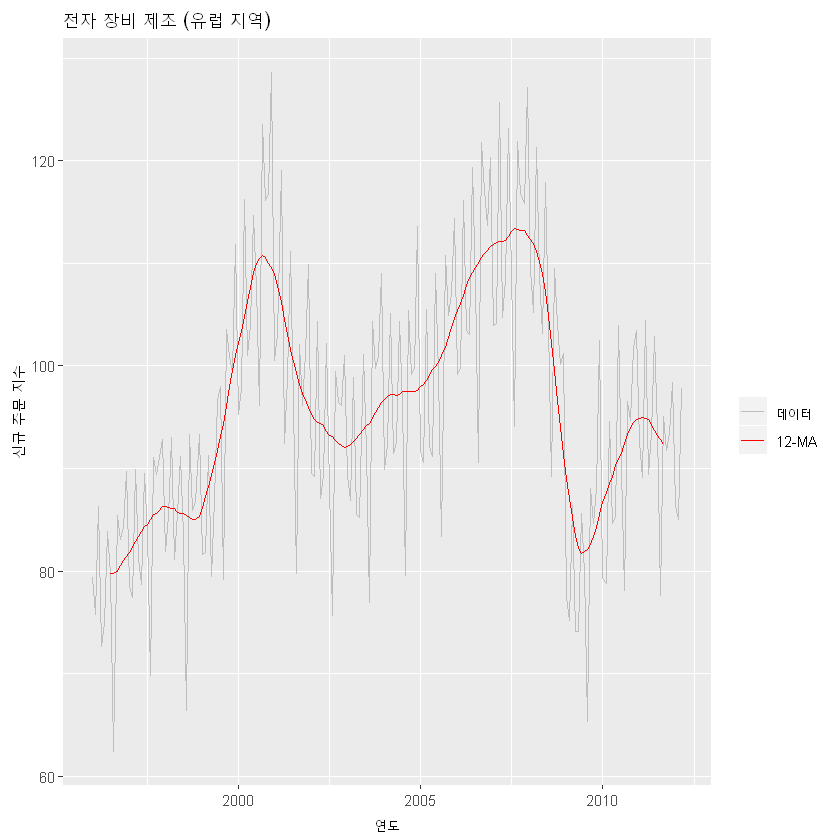

In [28]:
autoplot(elecequip, series="데이터") +
  autolayer(ma(elecequip, 12), series="12-MA") +
  xlab("연도") + ylab("신규 주문 지수") +
  ggtitle("전자 장비 제조 (유럽 지역)") +
  scale_colour_manual(values=c("데이터"="grey","12-MA"="red"),
                      breaks=c("데이터","12-MA")) +
  guides(colour=guide_legend(title=" "))
## Figure 6.7: 2x12-MA를 전자 장비 주문 지수에 적용한 것.

그림 6.7은 전자 장비 제조 지수에 2×12 -MA 를 적용한 결과입니다. 매끄러운 선에서 계절성이 보이지 않는다는 것에 주목

### 가중 이동평균

이동평균의 조합이 가중 이동평균(weighted moving average)이 되는 것을 확인.   
예를 들면, 위에서 언급한  2×4 -MA 는 가중치를 다음과 같이 주는 가중 5-MA와 같음.  $\left[\frac{1}{8},\frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{8}\right]$

가중 m -MA는 다음과 같이 쓸 수 있음.

\begin{align*}
   \hat{T}_t = \sum_{j=-k}^k a_j y_{t+j},
\end{align*}

여기에서 $k=(m-1)/2$ 이고, 가중치는 $\left[a_{-k},\dots,a_k\right]$로 주어짐.  
가중치 모두를 더하면 1,   
가중치들은 $a_j = a_{-j}$ 와 같이 대칭   
단순  m -MA는 모든 가중치를  1/m 으로 같게 둔 특별한 경우


더욱 매끄러운 추세-주기(trend-cycle)를 얻을 수 있다는 점이 가중평균(weighted average)의 주된 장점입니다. 

관측값에 가중치를 전부 고려하지 않고, 천천히 증가하다가 감소하는 가중치를 이용하여 더 매끄러운 곡선을 구합니다.

## 6.3 고전적인 분해법

고전적인 분해 기법은 1920년대에 창안되었습니다. 단순한 편이고 대부분의 다른 시계열 분해 방법의 기초

덧셈 분해와 곱셈 분해

고전적인 분해를 다룰 때는 계절적인 성분이 매년 일정하다고 가정

### 덧셈 분해

1 단계
  - m 이 짝수이면, 2×m-MA를 사용하여 추세-주기 성분 $\hat{T}_t$ 계산
  - m 이 홀수이면, m-MA를 사용하여 추세-주기 성분  $\hat{T}_t$ 계산

2 단계
  - 다음과 같이 추세를 제거한 시계열을 계산. $y_t - \hat{T}_t$

3 단계
  - 각 계절마다 계절성분을 측정하기 위해, 해당 계절에 대해 추세를 제거한 값의 평균을 계산. $\hat{S}_t$

4 단계
  - 다음과 같이 측정한 계절성과 추세-주기 성분을 빼서 나머지 성분을 계산. $\hat{R}_t = y_t - \hat{T}_t - \hat{S}_t$
  
### 곱셈 분해

고전적인 곱셈 분해법은 뺄셈을 나눗셈으로 바꾼 것

1 단계
  - m 이 짝수이면, 2×m-MA를 사용하여 추세-주기 성분 $\hat{T}_t$ 계산
  - m 이 홀수이면, m-MA를 사용하여 추세-주기 성분  $\hat{T}_t$ 계산

2 단계
  - 다음과 같이 추세를 제거한 시계열을 계산. $y_t / \hat{T}_t$

3 단계
  - 각 계절마다 계절성분을 측정하기 위해, 해당 계절에 대해 추세를 제거한 값의 평균을 계산. $\hat{S}_t$

4 단계
  - 다음과 같이 측정한 계절성과 추세-주기 성분을 나누어 나머지 성분을 계산. $ \hat{R}_{t} = y_t /( \hat{T}_t \hat{S}_t) $


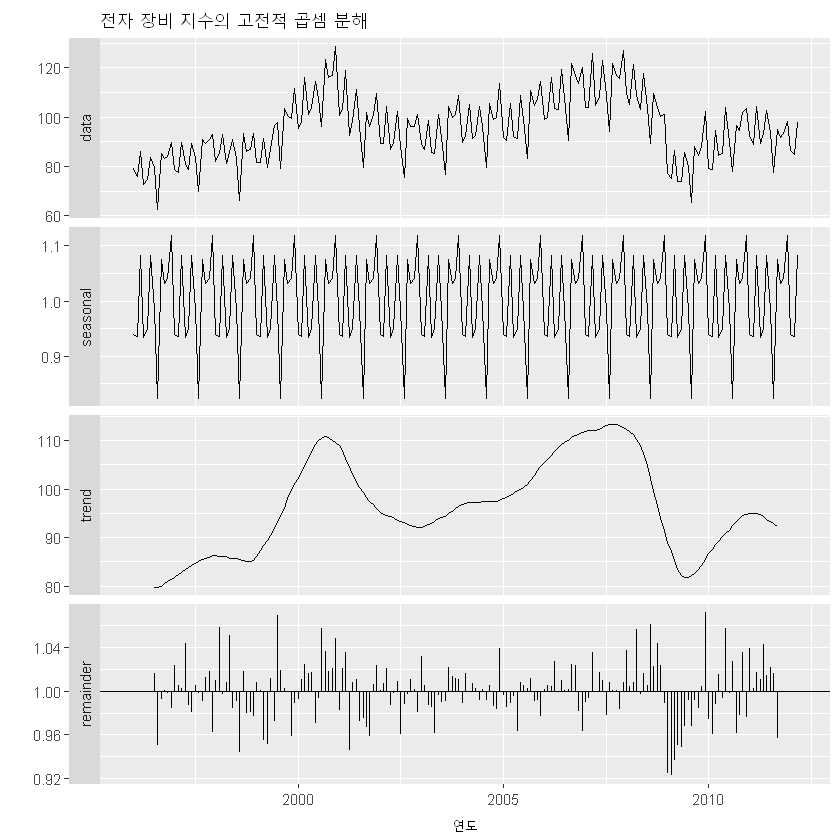

In [29]:
elecequip %>% decompose(type="multiplicative") %>%
  autoplot() + xlab("연도") +
  ggtitle("전자 장비 지수의 고전적 곱셈 분해")

## Figure 6.8: 전자 장비 신규 주문 지수의 고전적 곱셈 분해.

### 고전적인 분해에 대한 첨언

고전적인 분해법이 여전히 널리 사용되고 있지만, 추천하는 방법은 아님.

고전적인 분해법으로 다룰 때의 몇 가지 문제점

  - 처음 몇 개와 마지막 몇 개의 관측값에 대한 추세 추정값을 얻을 수 없습니다. 예를 들면, m = 12일 때, 처음 여섯개와 마지막 여섯개 관측값에 대한 추세 추정값은 존재하지 않음.
  
  - 추세-주기 측정은 (위의 예제에서 처럼) 데이터에 나타나는 급격한 증가나 감소를 과도하게 매끄럽게 함.
  
  - 고전적인 분해법은 계절성분이 매년 반복된다는 것을 가정함. 몇몇 더 긴 시계열에 대해서는 불합리적임.
  
  - 가끔 짧은 기간의 시계열 값이 특별히 이상할 수 있음. 예를 들면, 월별 항공 탑승자 수는 노사분규에 영향을 받을 수 있고 분쟁 기간 동안 평소보다 특이한 패턴이 나타남.

## 6.4 X11 분해

분기별 데이터와 월별 데이터를 분해할 때 인기 있는 또 하나의 기법은 미국 인구 조사국(the US Census Bureau)과 캐나다 통계청(Statistics Canada)에서 창안한 X11 기법

고전적인 분해의 단점을 극복하기 위한 많은 추가적인 단계와 특징을 포함
- 특별히 양 끝점을 포함한 모든 관측값에 대해 추세-주기 측정 가능
- 계절성분이 시간에 따라 느리게 변화 
- 거래일 변동, 휴일 효과, 알려진 예측치에 의한 효과 등을 다루기 위한 몇 가지 정교한 방법도 포함
- 이 과정은 완전히 자동이고, 시계열에서 나타나는 특이점이나 수준 변화가 주는 영향에 대해 매우 잘 견디는 경향

R의 seasonal 패키지에 있는 seas() 함수로 X11 기법을 이용

In [5]:
install.packages("seasonal", quiet=TRUE )

package 'seasonal' successfully unpacked and MD5 sums checked


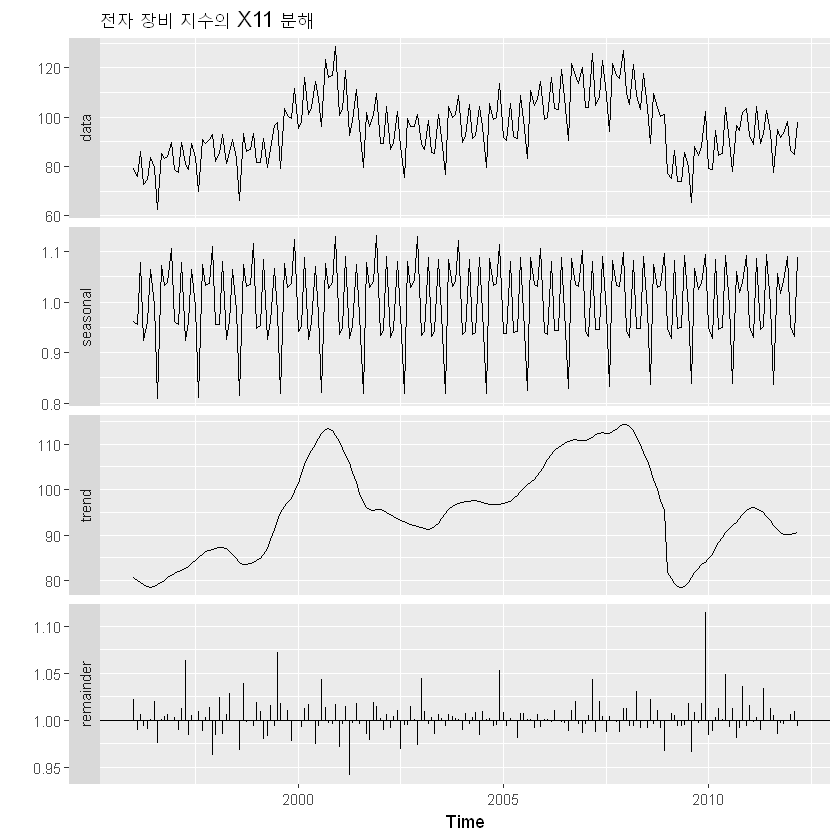

In [8]:
library(seasonal)
elecequip %>% seas(x11="") -> fit
autoplot(fit) +
  ggtitle("전자 장비 지수의 X11 분해")
## Figure 6.9: 전자 장비 신규 구매 지수의 X11 분해.

 X11 추세-주기는 다른 두 가지 기법보다 데이터에서 2009년 초반에 나타나는 갑작스럽게 떨어지는 패턴을 좀 더 잘 잡아내고,    
 2009년 말의 특이한 관측값이 이제 나머지 성분에서 더욱 분명하게 보입니다.

seas() 함수에서 주어진 출력으로, seasonal()가 계절성분을 추출할 것이고,   
trendcycle()가 추세-주기 성분을 추출할 것이고,   
remainder()가 나머지 성분을 추출할 것이고,   
seasadj()가 계절적으로 조정된 시계열을 계산

예를 들어, 그림 6.10은 원본 데이터에 대해 추세-주기 성분과 계절성으로 조정된 데이터를 나타냄.

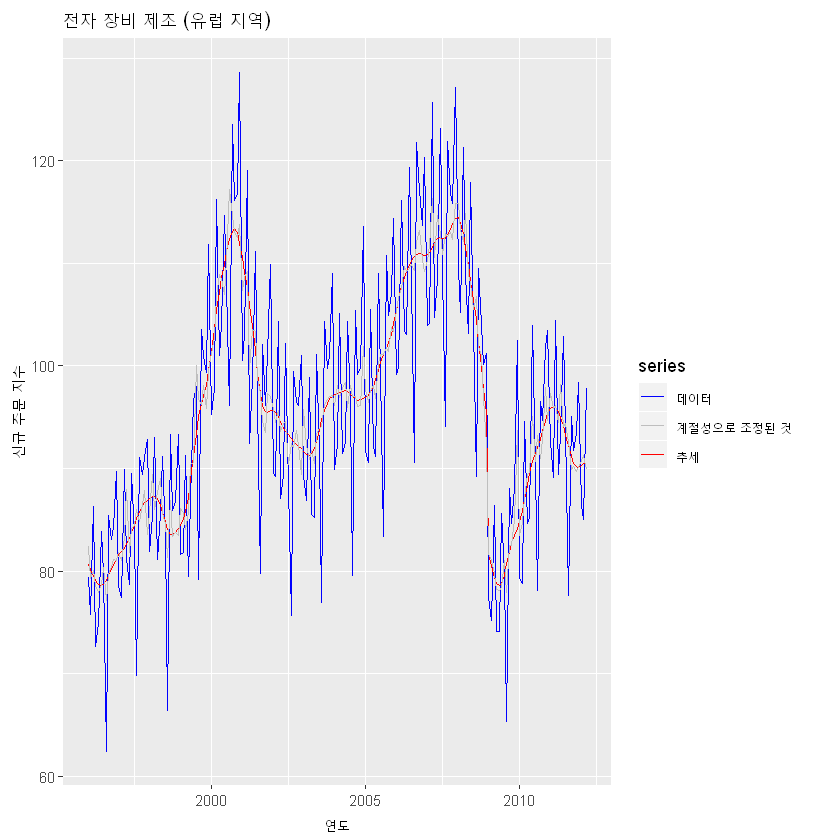

In [10]:
autoplot(elecequip, series="데이터") +
  autolayer(trendcycle(fit), series="추세") +
  autolayer(seasadj(fit), series="계절성으로 조정된 것") +
  xlab("연도") + ylab("신규 주문 지수") +
  ggtitle("전자 장비 제조 (유럽 지역)") +
  scale_colour_manual(values=c("gray","blue","red"),
             breaks=c("데이터","계절성으로 조정된 것","추세"))
## Figure 6.10: 전자 장비 주문: 원본 데이터(회색), 추세-주기 성분(빨간색), 계절성으로 조정된 데이터(파란색).

계절성분의 계절성 그래프와 계절성 부-시계열 그래프는 시간에 따른 계절성분의 변화를 보여줌.

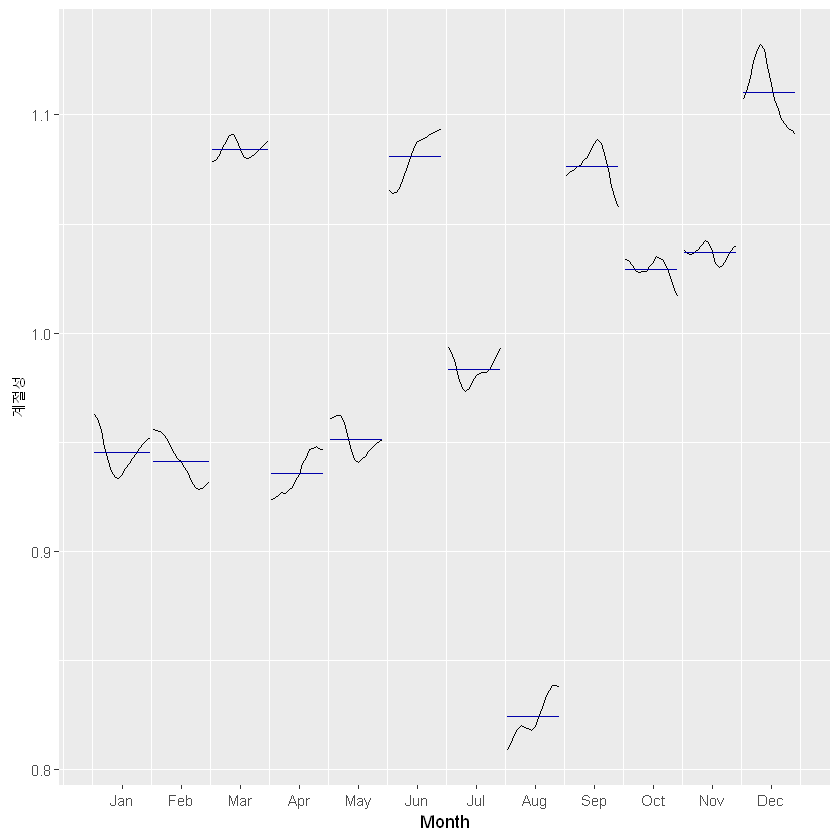

In [11]:
fit %>% seasonal() %>% ggsubseriesplot() + ylab("계절성")
### Figure 6.11: 전자 장비 신규 주문 지수의 X11 분해로부터 얻은 계절성분의 계절성 부-시계열 그래프.

## 6.5 SEATS 분해

SEATS는 Seasonal Extraction in ARIMA Time Series(ARIMA 시계열에서 계절성 추출)의 줄임말

스페인 은행에서 이 방법을 개발하였으며, 이제는 전세계 정부 기관에서 널리 사용

이 방법은 분기별 데이터와 월별 데이터에서만 작동합니다. 따라서 일별, 시간별, 주별 등 다른 종류의 계절성은 다른 접근 방식으로 다뤄야함.

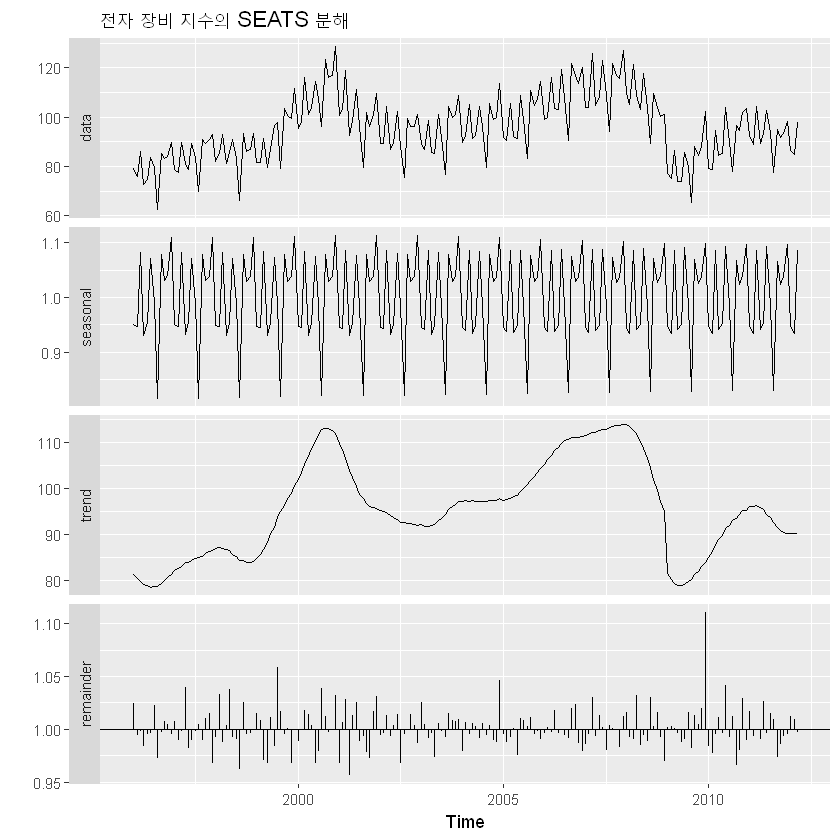

In [13]:
library(seasonal)
elecequip %>% seas() %>%
autoplot() +
  ggtitle("전자 장비 지수의 SEATS 분해")
## Figure 6.12: 전자 장비 신규 구매 지수의 SEATS 분해.

이 결과는 그림 6.9에 나타낸 X11 분해와 꽤 비슷합니다.   

X11 기법처럼, 각 성분을 seasonal(), trendcycle(), remainder() 함수로 분리할 수 있고, seasadj()로 계절성으로 조정된 시계열을 계산

## 6.6 STL 분해

STL은 다양한 상황에서 사용할 수 있는 강력한 시계열 분해 기법

STL은 “Seasonal and Trend decomposition using Loess(Loess를 사용한 계절성과 추세 분해)”의 약자

Loess는 비선형 관계를 추정하기 위한 기법

STL은 고전적인 분해, SEATS, X11을 뛰어넘는 몇 가지 장점
- STL은 월별이나 분기별 데이터를 포함하여 어떤 종류의 계절성
- 계절적인 성분이 시간에 따라 변해도 괜찮습니다. 계절성분의 변화율을 사용자가 조절
- 추세-주기의 매끄러운 정도를 사용자가 조절
- 가끔 있는 이상값이 추세-주기와 계절성분에 영향을 주지 않게 만들 수 있음

STL은 몇 가지 단점
- 특별히, 거래일이나 달력 변동을 자동으로 다루지 않고
- 덧셈 분해만 지원

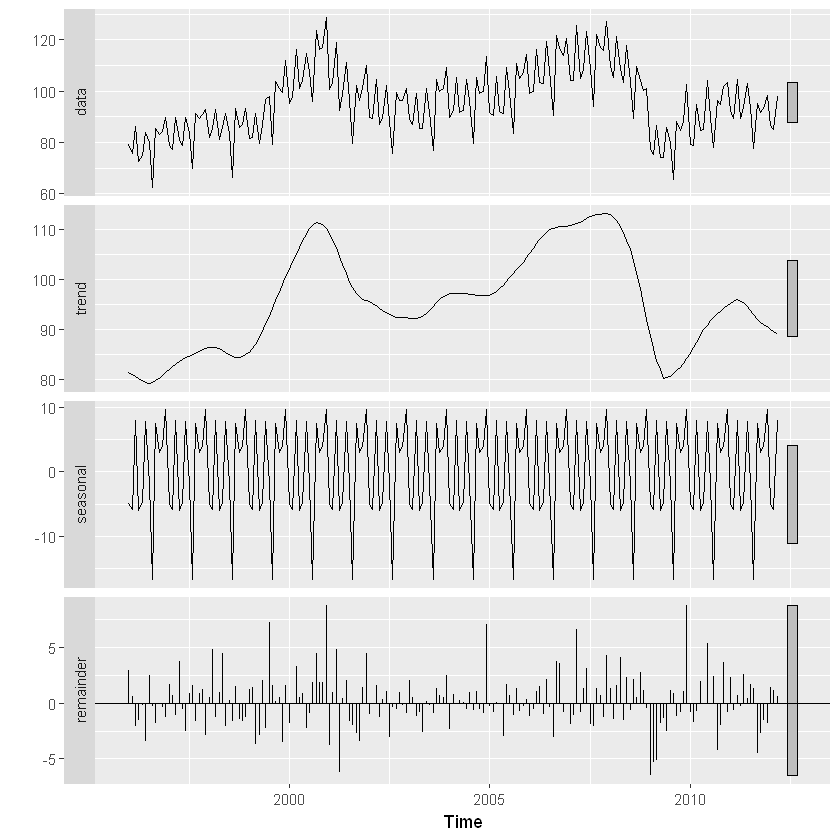

In [14]:
elecequip %>%
  stl(t.window=13, s.window="periodic", robust=TRUE) %>%
  autoplot

## Figure 6.13: 전자 장비 지수(위)와 유동적인 추세-주기와 고정된 계절성을 고려하는 안정적인 STL 분해로부터 얻은 세 가지 덧셈 성분.

STL을 사용할 때 선택한 두 개의 주 매개변수는 추세-주기 윈도우(t.window)와 계절성 윈도우(s.window)입니다.  
이러한 매개변수로 추세-주기와 계절성분이 급격하게 변할지 조절 가능  
값이 작을 수록 더 급격하게 변합니다. t.window와 s.window 둘 다 홀수.

t.window는 추세-주기를 추정할 때 사용할 연이은 관측값의 개수   
s.window는 계절성분에서 각 값을 추정할 때 사용할 연이은 관측값의 개수

## 6.7 추세와 계절성의 강도를 측정하기

시계열 분해는 시계열에서 추세와 계절성의 강도를 측정하는데 사용 가능

시계열 분해를 다음과 같음

$$ y_t = T_t + S_{t} + R_t, $$

$T_t$ 는 평활된 추세 성분이고,   
$S_t$ 는 계절성 성분,   
$R_t$ 는 나머지 성분

추세의 강도를 다음과 같이 정의

$$ F_T = \max\left(0, 1 - \frac{\text{Var}(R_t)}{\text{Var}(T_t+R_t)}\right). $$

이 식을 통해 추세의 강도를 0과 1 사이 값

계절성의 강도를 비슷하게 정의

$$ F_S = \max\left(0, 1 - \frac{\text{Var}(R_t)}{\text{Var}(S_{t}+R_t)}\right). $$

## 6.8 분해법으로 예측하기

분해가 주로 시계열 데이터를 연구하거나 시간에 따른 변화를 살펴볼 때 유용하긴 하지만, 예측에도 사용

덧셈 분해를 가정하면,

$$ y_t = \hat{S}_t + \hat{A}_t, $$

여기에서  $\hat{A}_t = \hat{T}_t+\hat{R}_{t}$  는 계절성으로 조정된 성분

곱셈 분해를 사용한다면

$$ y_t = \hat{S}_t\hat{A}_t, $$

여기에서, $ \hat{A}_t = \hat{T}_t\hat{R}_{t} $

분해된 시계열을 예측하기 위해서, 계절성분  $\hat{S}_t$ 과 계절성으로 조정된 성분  $\hat{A}_t$ 각각을 예측해보자.

계절성분  $\hat{S}_t$ 측정
  - 계절성분이 변하지 않거나 엄청나게 느리게 변하는 상황을 보통 가정하고
  - 측정한 성분의 마지막 연도를 이용하여 예측.
  - 계절성분에 나이브 계절성 기법 라고 함.
  
계절성으로 조정된 성분  $\hat{A}_t$ 측정
  - 비-계절성 예측 기법을 사용
  - 예를 들면, 표류를 고려하는 확률보행 모델(a random walk with drift model) ( 7장 )
  - 홀트(Holt)의 기법 
  - 비-계절성 ARIMA 모델 (8장 )
  

### 예제: 전자 장비 제조

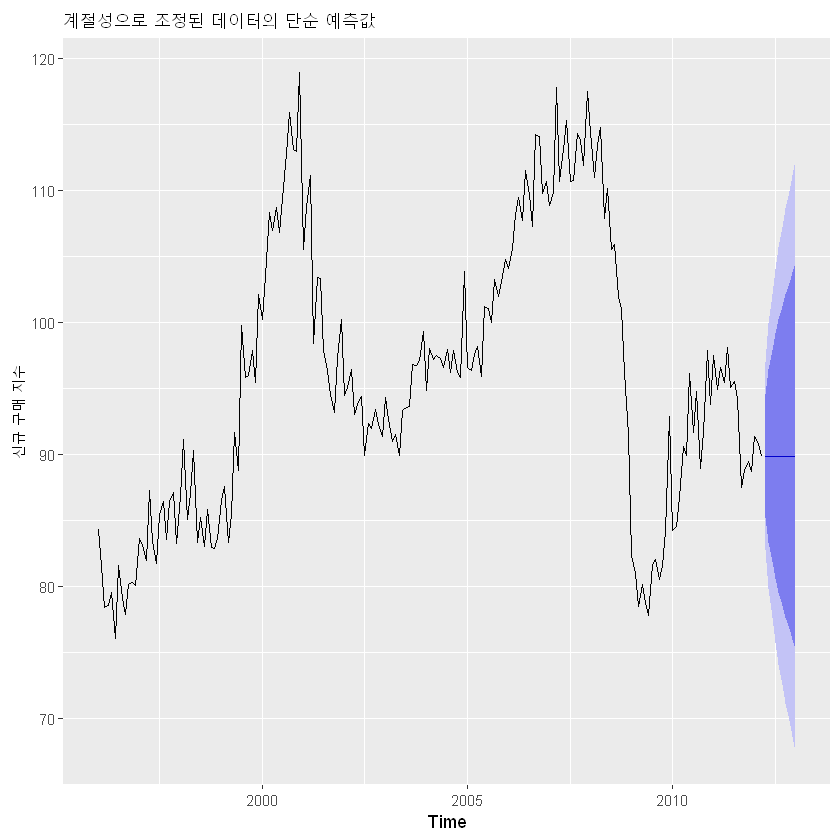

In [15]:
fit <- stl(elecequip, t.window=13, s.window="periodic",
  robust=TRUE)
fit %>% seasadj() %>% naive() %>%
  autoplot() + ylab("신규 구매 지수") +
  ggtitle("계절성으로 조정된 데이터의 단순 예측값")
## Figure 6.14: 전자 장비 주문 데이터의 STL 분해로부터 얻은 계절성으로 조정된 데이터의 단순(naïve) 예측값.

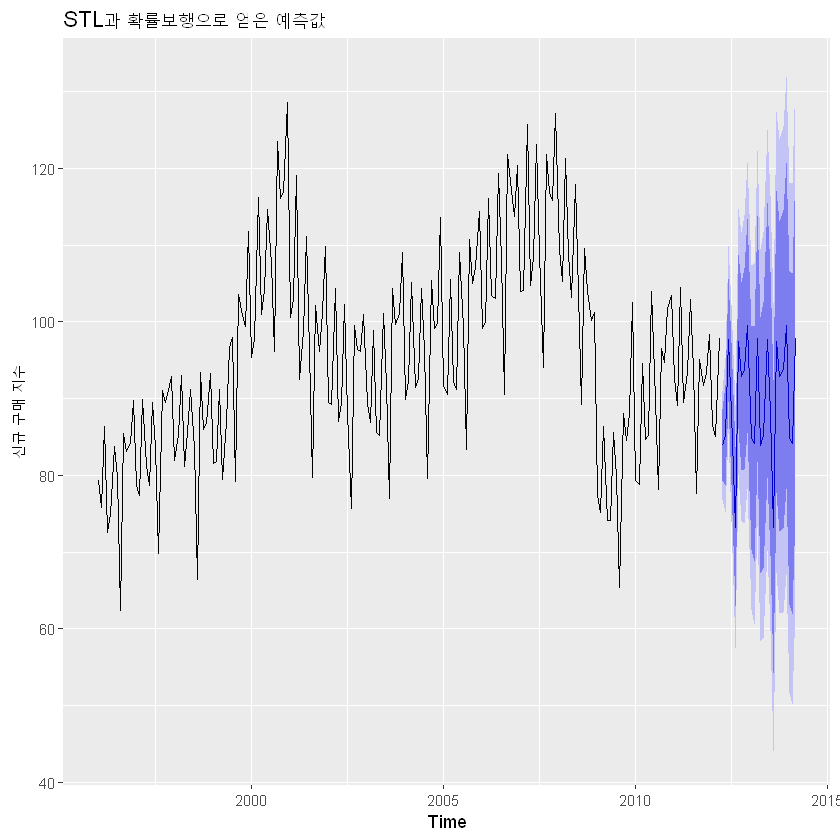

In [17]:
fit %>% forecast(method="naive") %>%
  autoplot() + ylab("신규 구매 지수") +
  ggtitle("STL과 확률보행으로 얻은 예측값")

## Figure 6.15: 데이터를 STL 분해 후, 계절성으로 조정된 데이터의 단순 예측값과 
## 계절성분의 계절성 단순 예측값에 근거한 전자 장비 구매 데이터 예측값.

stlf 함수를 이용하면 좀 더 간단하게 작업

In [18]:
fcast <- stlf(elecequip, method='naive')

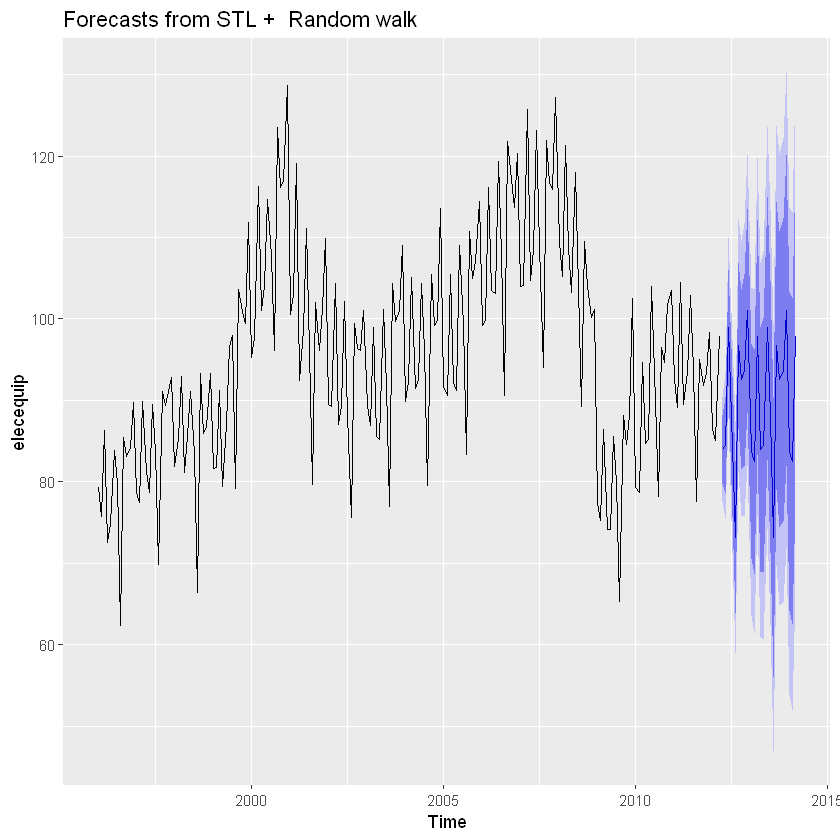

In [20]:
fcast %>%
  autoplot()